In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Pegando os dados

In [3]:
estatisticas_market = pd.read_csv('/content/drive/MyDrive/Drive_projeto_Codenation/estaticos_market.csv')

columns = estatisticas_market.columns

columns

Index(['Unnamed: 0', 'id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat',
       ...
       'media_meses_servicos', 'max_meses_servicos', 'min_meses_servicos',
       'qt_funcionarios', 'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais'],
      dtype='object', length=182)

### Pre-processando dos dados

In [4]:
# setando percentil de NaN nas colunas
columns_with_percentil_NaN = estatisticas_market.isnull().sum() / estatisticas_market.shape[0]
columns_with_percentil_NaN

Unnamed: 0                 0.000000
id                         0.000000
fl_matriz                  0.000000
de_natureza_juridica       0.000000
sg_uf                      0.000000
                             ...   
qt_funcionarios_24meses    0.775958
tx_crescimento_12meses     0.840172
tx_crescimento_24meses     0.839900
tx_rotatividade            0.775958
qt_filiais                 0.000000
Length: 182, dtype: float64

In [5]:
# variaveis para plotar

def retrivie_qty_vars(percentil):
    return len(columns_with_percentil_NaN[columns_with_percentil_NaN <= (percentil/100)])

percentils = []
for index in range(100):
    percentils.append(index + 1)

length_vars = []
for index in range(100):
    length_vars.append(retrivie_qty_vars(percentils[index]))

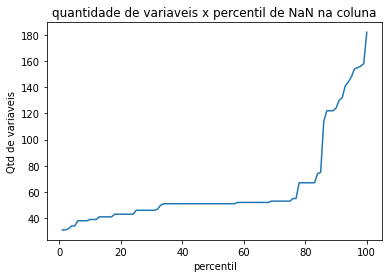

In [6]:
# plotando grafico quantidade de variaveis x percentil de NaN na coluna

plt.plot(percentils, length_vars)

plt.title("quantidade de variaveis x percentil de NaN na coluna")
plt.xlabel('percentil')
plt.ylabel('Qtd de variaveis')
plt.show()

Verificando o grafico acima escolhemos por volta dos 80%

In [7]:
# pegando colunas com indice menor que 80%
index_to_remove = columns_with_percentil_NaN[columns_with_percentil_NaN > 0.06]
df_to_work = estatisticas_market.drop(columns=index_to_remove.index).drop(columns=['Unnamed: 0'])
df_to_work

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,ALTA,False,True,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,0.0,0.0,PI,CINZA,ATE 1 ANO,BAIXA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,2011-09-26,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,False,True,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,2012-04-25,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,False,2015-08-17,False,True,True,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,ALTA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO E REPARACAO DE VEICULOS,COMERCIO,3.254795,1 a 5,False,False,False,True,False,2015-07-28,False,True,True,NAO,COMERCIO E REPARACAO DE VEICULOS AUTOMOTORES E...,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,ALTA,False,False,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS ADMINISTRATIVOS,SERVIÇO,8.953425,5 a 10,False,False,False,False,False,2009-11-16,False,False,False,SIM,SELECAO AGENCIAMENTO E LOCACAO DE MAO DE OBRA,ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEME...,False,False,False,0.0,0.0,PI,LARANJA,ACIMA DE 1 ANO,MUITO BAIXA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,True,ASSOCIACAO PRIVADA,MA,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS DE SAUDE,SERVIÇO,20.745205,> 20,False,False,False,False,False,2005-11-03,False,False,False,SIM,ATIVIDADES DE ATENCAO A SAUDE HUMANA,SAUDE HUMANA E S

In [8]:
df_to_work_numerical = df_to_work.select_dtypes(include='number')
df_to_work_numerical.head(6)

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,14.457534,0.0,0.0,3132172.8,3132172.8,0
1,1.463014,0.0,0.0,210000.0,210000.0,0
2,7.093151,0.0,0.0,50000.0,50000.0,0
3,6.512329,0.0,0.0,210000.0,210000.0,0
4,3.200000,0.0,0.0,210000.0,210000.0,0
5,38.079452,0.0,0.0,210000.0,210000.0,0


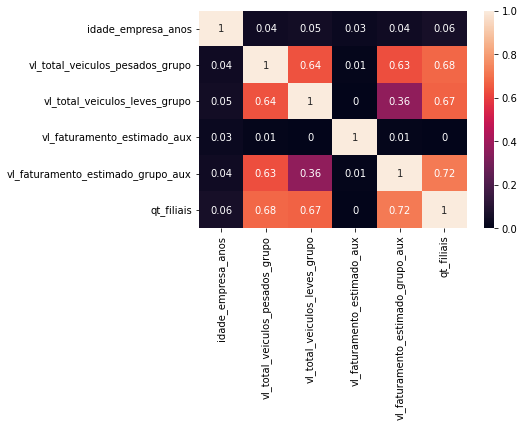

In [9]:
sns.heatmap(df_to_work_numerical.corr().round(2), annot= True)

In [10]:
df_to_work_categorical = df_to_work.select_dtypes(exclude=['number', 'bool'])
df_to_work_categorical.dtypes

id                                     object
de_natureza_juridica                   object
sg_uf                                  object
natureza_juridica_macro                object
de_ramo                                object
setor                                  object
idade_emp_cat                          object
dt_situacao                            object
fl_rm                                  object
nm_divisao                             object
nm_segmento                            object
fl_spa                                 object
fl_antt                                object
fl_veiculo                             object
sg_uf_matriz                           object
de_saude_tributaria                    object
de_saude_rescencia                     object
de_nivel_atividade                     object
fl_simples_irregular                   object
fl_passivel_iss                        object
de_faixa_faturamento_estimado          object
de_faixa_faturamento_estimado_grup

In [14]:
df_to_work_categorical.head()

,id,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,10 a 15,2005-03-25,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,RN,VERDE,ACIMA DE 1 ANO,ALTA,False,True,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00"
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1 a 5,2017-05-12,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,PI,CINZA,ATE 1 ANO,BAIXA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,5 a 10,2011-09-26,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,False,True,"ATE R$ 81.000,00","ATE R$ 81.000,00"
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,5 a 10,2012-04-25,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,1 a 5,2015-08-17,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,RN,VERDE,ACIMA DE 1 ANO,ALTA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"


In [20]:
for col in df_to_work_categorical.columns:
    print([col, len(df_to_work_categorical[col].unique()), df_to_work_categorical[col].unique()])

['id', 462298, array(['a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849',
       '6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05',
       '4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08',
       ...,
       '9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1ff859a7a9228bd6cad',
       '84db0f17467cf4f02439e01ade57150b6ac59d9dae53edb2f43d68b0e55fb766',
       '3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a'],
      dtype=object)]
['de_natureza_juridica', 67, array(['SOCIEDADE EMPRESARIA LIMITADA', 'EMPRESARIO INDIVIDUAL',
       'COOPERATIVA', 'ASSOCIACAO PRIVADA', 'ENTIDADE SINDICAL',
       'CONSORCIO DE SOCIEDADES', 'SOCIEDADE DE ECONOMIA MISTA',
       'CONDOMINIO EDILICIO', 'ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL',
       'MUNICIPIO', 'ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO',
       'SOCIEDADE ANONIMA ABERTA',
       'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA',
       'CANDIDATO A C

In [ ]:
colunas_categoricas_novo_filtro = ['de_natureza_juridica', 'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo', 'nm_segmento', 'nm_divisao', 'setor', 'natureza_juridica_macro']